In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings('ignore')


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Our data: 2002-2020 yearly stats for each player

In [38]:
#import our CSV file
yearly_stats_all_pos_df = pd.read_csv('yearly data/all_players_yearly_stats_2002-2020.csv')
yearly_stats_all_pos_df.head()

,Season,Rk,Player,Team,Pos,Age,Games Played,Games Started,Pass Comp,Pass Att,...,Total TD,2pt Convs Made,2pt Conv Passes,FPts,PPR,DK Fpts,FD Fpts,VBD,Pos Rank,Overall Rank
0,2019,34,A.J. Brown,TEN,WR,22,16,11,0,0,...,9,0,0,165,217.1,220.1,191.1,36,9,34
1,2020,28,A.J. Brown,TEN,WR,23,14,12,0,0,...,12,0,0,178,247.5,251.5,212.5,52,9,28
2,2016,348,A.J. Derby,2TM,TE,25,10,3,0,0,...,0,0,0,14,30.0,34.0,22.0,0,65,0
3,2017,270,A.J. Derby,2TM,TE,26,11,1,0,0,...,2,0,0,34,55.4,59.4,44.9,0,41,0
4,2018,381,A.J. Derby,MIA,TE,27,4,0,0,0,...,1,0,0,11,13.8,13.8,12.3,0,75,0


In [49]:
#pull only previous year data (OR WHATEVER YEAR(S) WE WANT)
previous_year_stats_all_pos_df = yearly_stats_all_pos_df[yearly_stats_all_pos_df['Season'] == 2019]
previous_year_stats_all_pos_df.head()

,Season,Rk,Player,Team,Pos,Age,Games Played,Games Started,Pass Comp,Pass Att,...,Total TD,2pt Convs Made,2pt Conv Passes,FPts,PPR,DK Fpts,FD Fpts,VBD,Pos Rank,Overall Rank
0,2019,34,A.J. Brown,TEN,WR,22,16,11,0,0,...,9,0,0,165,217.1,220.1,191.1,36,9,34
24,2019,348,A.J. McCarron,HOU,QB,29,2,1,21,37,...,1,0,0,17,16.9,17.9,17.9,0,50,0
44,2019,4,Aaron Jones,GNB,RB,25,16,16,0,0,...,19,0,0,266,314.8,322.8,290.3,125,3,4
68,2019,56,Aaron Rodgers,GNB,QB,36,16,16,353,569,...,1,1,2,278,278.4,292.4,282.4,15,9,56
94,2019,221,Adam Humphries,TEN,WR,26,12,3,0,0,...,2,0,0,50,86.5,89.5,68.0,0,85,0


In [50]:
#drop unneccessary columns
previous_year_stats_all_pos_df.drop(['Rk', 'Games Started', '2pt Conv Passes', '2pt Convs Made', 'FPts', 'DK Fpts', 'FD Fpts', 'Pos Rank', 'Overall Rank', 'Fumbles', 'Total TD' ], axis=1, inplace=True)

In [51]:
#review columns
previous_year_stats_all_pos_df.columns

Index(['Season', 'Player', 'Team', 'Pos', 'Age', 'Games Played', 'Pass Comp',
       'Pass Att', 'Pass Yds', 'Pass TD', 'Pass Int', 'Rush Att', 'Rush Yds',
       'Rush Y/A', 'Rush TD', 'Rec Tgt', 'Receptions', 'Rec Yds', 'Rec Y/R',
       'Rec TD', 'Fumbles Lost', 'PPR', 'VBD'],
      dtype='object')

In [54]:
x = previous_year_stats_all_pos_df[['Age', 'Games Played', 'Pass Comp',
       'Pass Att', 'Pass Yds', 'Pass TD', 'Pass Int', 'Rush Att', 'Rush Yds',
       'Rush Y/A', 'Rush TD', 'Rec Tgt', 'Receptions', 'Rec Yds', 'Rec Y/R',
       'Rec TD', 'Fumbles Lost']]
y = previous_year_stats_all_pos_df['PPR'].values.reshape(-1, 1)

#x = previous_year_stats_all_pos_df.drop(['Season', 'Player', 'Team', 'Pos', 'PPR', 'VBD'], axis = 1)
#y = previous_year_stats_all_pos_df['PPR'].values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(x_train, y_train) #training the algorithm
y_pred = regressor.predict(x_test)

In [57]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head()

,Actual,Predicted
0,156.7,153.331790
1,81.9,82.270770
2,94.9,94.760668
3,45.5,45.644207
4,12.3,12.255573


In [58]:
previous_year_stats_all_pos_df.join(df)

,Season,Player,Team,Pos,Age,Games Played,Pass Comp,Pass Att,Pass Yds,Pass TD,...,Rec Tgt,Receptions,Rec Yds,Rec Y/R,Rec TD,Fumbles Lost,PPR,VBD,Actual,Predicted
0,2019,A.J. Brown,TEN,WR,22,16,0,0,0,0,...,84,52,1051,20.21,8,0,217.1,36,156.7,153.331790
24,2019,A.J. McCarron,HOU,QB,29,2,21,37,225,0,...,0,0,0,0.00,0,0,16.9,0,145.5,146.245677
44,2019,Aaron Jones,GNB,RB,25,16,0,0,0,0,...,68,49,474,9.67,3,2,314.8,125,51.8,52.286840
68,2019,Aaron Rodgers,GNB,QB,36,16,353,569,4002,26,...,0,0,0,0.00,0,4,278.4,15,202.8,202.883280
94,2019,Adam Humphries,TEN,WR,26,12,0,0,0,0,...,47,37,374,10.11,2,0,86.5,0,79.0,79.693710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9755,2019,Zach Gentry,PIT,TE,23,4,0,0,0,0,...,1,1,4,4.00,0,0,1.4,0,NaN,NaN
9761,2019,Zach Line,NOR,RB,29,12,0,0,0,0,...,10,6,36,6.00,0,0,11.6,0,NaN,NaN
9779,2019,Zach Pascal,IND,WR,25,16,0,1,0,0,...,72,41,607,14.80,5,0,135.3,0,NaN,NaN
9791,2019,Zach Zenner,3TM,RB,28,5,0,0,0,0,...,3,2,19,9.50,0,0,3.7,0,NaN,NaN


In [44]:
regressor.score(x_test, y_test)

0.9998271329646408

# Turotial Data: 2019 stats for each player

In [3]:
#import our CSV file
df = pd.read_csv('yearly data/2019.csv')
#drop unneccessary columns
df.drop(['Rk', '2PM', '2PP', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank', 'PPR', 'Fmb', 'GS'], axis=1, inplace=True)

#fix name formatting
df['Player'] = df['Player'].apply(lambda x: x.split('*')[0]).apply(lambda x: x.split('\\')[0])

#rename columns
df.rename({
    'TD': 'PassingTD',
    'TD.1': 'RushingTD',
    'TD.2': 'ReceivingTD',
    'TD.3': 'TotalTD',
    'Yds': 'PassingYDs',
    'Yds.1': 'RushingYDs',
    'Yds.2': 'ReceivingYDs',
    'Att': 'PassingAtt',
    'Att.1': 'RushingAtt'
}, axis=1, inplace=True)

#seperate dataframes based off position
rb_df = df[df['FantPos'] == 'RB']
qb_df = df[df['FantPos'] == 'QB']
wr_df = df[df['FantPos'] == 'WR']
te_df = df[df['FantPos'] == 'TE']

rb_df.head()

,Player,Tm,FantPos,Age,G,Cmp,PassingAtt,PassingYDs,PassingTD,Int,...,Y/A,RushingTD,Tgt,Rec,ReceivingYDs,Y/R,ReceivingTD,FL,TotalTD,FantPt
0,Christian McCaffrey,CAR,RB,23,16,0,2,0,0,0,...,4.83,15,142,116,1005,8.66,4,0,19,355.0
2,Derrick Henry,TEN,RB,25,15,0,0,0,0,0,...,5.08,16,24,18,206,11.44,2,3,18,277.0
3,Aaron Jones,GNB,RB,25,16,0,0,0,0,0,...,4.59,16,68,49,474,9.67,3,2,19,266.0
4,Ezekiel Elliott,DAL,RB,24,16,0,0,0,0,0,...,4.51,12,71,54,420,7.78,2,2,14,258.0
5,Dalvin Cook,MIN,RB,24,14,0,0,0,0,0,...,4.54,13,63,53,519,9.79,0,2,13,239.0


In [4]:
rushing_columns = ['RushingAtt', 'RushingYDs', 'Y/A', 'RushingTD']
receiving_columns = ['Tgt', 'Rec', 'ReceivingYDs', 'Y/R', 'ReceivingTD']

def transform_columns(df, new_column_list):
    df = df[['Player','Tm', 'Age', 'G','FantPt'] + new_column_list + ['FL']]
    return df

rb_df = transform_columns(rb_df, rushing_columns+receiving_columns)

rb_df['FantasyPoints'] = (rb_df['RushingYDs']*0.1 + rb_df['RushingTD']*6+ rb_df['ReceivingYDs']*0.1 + rb_df ['ReceivingTD']*6 - rb_df['FL']*2)
rb_df['Total Usage'] = (rb_df['RushingAtt'] + rb_df['Tgt'])
rb_df = rb_df[rb_df['RushingAtt'] > 20]

In [5]:
x = rb_df['Total Usage'].values.reshape(-1, 1)
y = rb_df['FantasyPoints'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(x_train, y_train) #training the algorithm
y_pred = regressor.predict(x_test)

In [6]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head()

,Actual,Predicted
0,265.8,199.907703
1,111.1,95.167927
2,143.2,171.037124
3,165.3,173.051350
4,171.6,176.408394


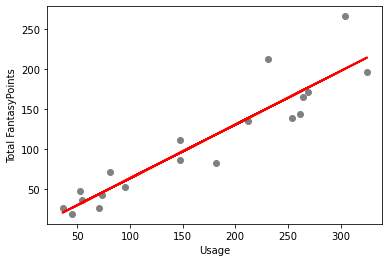

In [7]:
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.xlabel('Usage')
plt.ylabel('Total FantasyPoints')
plt.show()

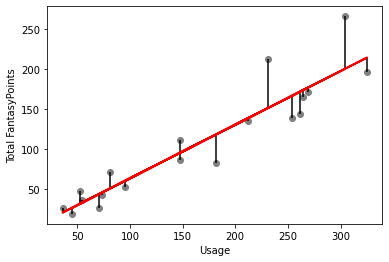

In [8]:
fig, ax = plt.subplots()

plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)

#plot the vertical distance between y_test and y_pred
ax.vlines(x_test, y_test, y_pred)

plt.xlabel('Usage')
plt.ylabel('Total FantasyPoints')
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test,y_pred)
rmse = math.sqrt(mse)
rmse

26.049902859860683